# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Health Analytics
- Course ID: BDA700NAA.05841.2247
- Data Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/code


## Goal: 
 Develop a model to predict the heart disease ("HadHeartAttack") based on the other variables.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# make sure to install the following packages on virtual environment
# pip install geopy pandas matplotlib numpy plotly

In [89]:
# load data
df = pd.read_csv('heart_2022_with_nans.csv')
# columns
print("Columns: \n", df.columns)
# first 5 observations
df.head()

Columns: 
 Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Data Cleaning

In [90]:
# Remove null data
df = df.dropna()
# Check for null data for each column
print("Null data: \n", df.isnull().sum())
# Check the entire null data
print("Null data: \n", df.isnull().sum().sum())

Null data: 
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms         

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

In [92]:
# Lebeling data

# GeneralHealth; ordering data
dict1 = {'Excellent': 5, 'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
# LastCheckupTime; ordering data
dict2 = {
    'Within past year (anytime less than 12 months ago)': 1, 
    'Within past 2 years (1 year but less than 2 years ago)': 2, 
    'Within past 5 years (2 years but less than 5 years ago)': 3,
    '5 or more years ago': 4
    }
# RemovedTeeth: ordering data
dict3 = {'None of them': 1, '1 to 5': 2, '6 or more, but not all': 3, 'All of them': 4}
# HadDiabetes: binary data
dict4 = {'No, pre-diabetes or borderline diabetes': 'Yes', 'Yes, but only during pregnancy (female)': 'No'}
# SmokerStatus: ordering data
dict5 = {'Never smoked': 1, 'Former smoker': 2, 'Current smoker - now smokes some days': 3, 'Current smoker - now smokes every day': 4}
# ECigaretteUsage: ordering data
dict6 = {
    'Never used e-cigarettes in my entire life': 1,
    'Not at all (right now)': 2,
    'Use them some days': 3,
    'Use them every day': 4
}
# AgeCategory: ordering data
dict7 = {
    'Age 18 to 24': 1,
    'Age 25 to 29': 2,
    'Age 30 to 34': 3,
    'Age 35 to 39': 4,
    'Age 40 to 44': 5,
    'Age 45 to 49': 6,
    'Age 50 to 54': 7,
    'Age 55 to 59': 8,
    'Age 60 to 64': 9,
    'Age 65 to 69': 10,
    'Age 70 to 74': 11,
    'Age 75 to 79': 12,
    'Age 80 or older': 13
}
# TetanusLast10Tdap: binary data
dict8 = {
    'No, did not receive any tetanus shot in the past 10 years': 'No',
    'Yes, received tetanus shot but not sure what type': 'Yes',
    'Yes, received Tdap': 'Yes',
    'Yes, received tetanus shot, but not Tdap': 'Yes'
}
# CovidPos: binary data
dict9 = {'Tested positive using home test without a health professional': 'Yes'}


# mapping defined dictionaries to the dataframe
df['GeneralHealth'] = df['GeneralHealth'].map(dict1).fillna(df['GeneralHealth'])
df['LastCheckupTime'] = df['LastCheckupTime'].map(dict2).fillna(df['LastCheckupTime'])
df['RemovedTeeth'] = df['RemovedTeeth'].map(dict3).fillna(df['RemovedTeeth'])
df['HadDiabetes'] = df['HadDiabetes'].map(dict4).fillna(df['HadDiabetes'])
df['SmokerStatus'] = df['SmokerStatus'].map(dict5).fillna(df['SmokerStatus'])
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(dict6).fillna(df['ECigaretteUsage'])
df['AgeCategory'] = df['AgeCategory'].map(dict7).fillna(df['AgeCategory'])
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(dict8).fillna(df['TetanusLast10Tdap'])
df['CovidPos'] = df['CovidPos'].map(dict9).fillna(df['CovidPos'])

In [114]:
df.value_counts()

State       Sex     GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  HadKidneyDisease  HadArthritis  HadDiabetes  DeafOrHardOfHearing  BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  DifficultyDressingBathing  DifficultyErrands  SmokerStatus  ECigaretteUsage  ChestScan  RaceEthnicityCategory     AgeCategory  HeightInMeters  WeightInKilograms  BMI    AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos
Arizona     Female  5              0.0                 0.0               1                Yes                 7.0         1.0           No              No         No         No         Yes            No       No                     No                Yes           No           No                   No                       No                       No          

In [120]:
# Convert binary columns to 0 and 1, keep other columns as is
df_num = df.apply(lambda x: x.map({'Yes': 1, 'No': 0}) if set(x.unique()) == {'Yes', 'No'} else x)
# remove non-numeric columns
df_num = df_num.select_dtypes(include=['int64', 'float64'])
df_num.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,4,4.0,0.0,1,1,9.0,0,0,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
343,4,0.0,0.0,1,1,6.0,0,0,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
345,4,0.0,0.0,1,0,8.0,0,0,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
346,2,5.0,0.0,1,1,9.0,0,0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
347,3,3.0,15.0,1,1,5.0,0,0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


## Descriptive Analysis

### Target Variable

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


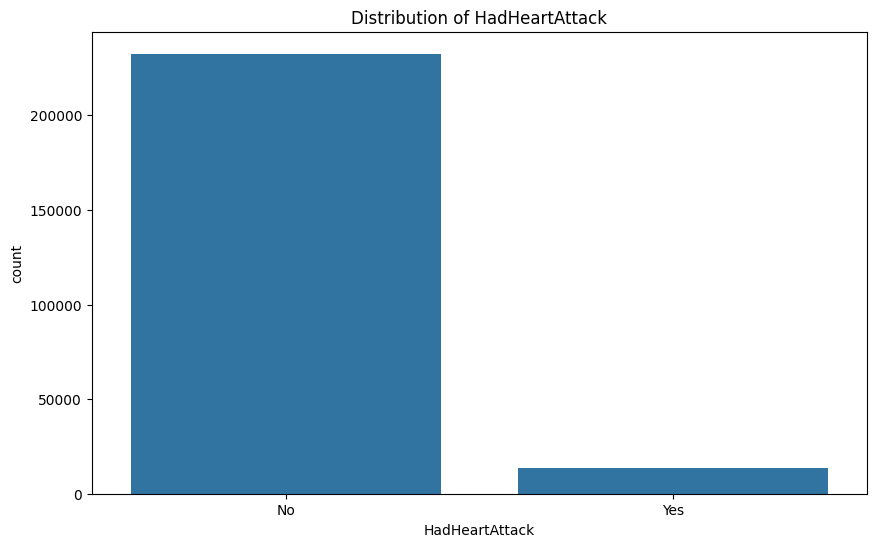

In [93]:
target = df['HadHeartAttack']
# check the distribution of the target variable
print(target.value_counts())
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target)
plt.title('Distribution of HadHeartAttack')
plt.show()

### Stacked Bar Chart
- Considering the target variable "HadHeartAttack".
- Each ratio is calculated by the proportion of "Yes" for each category.
- The higher the ratio, the more likely the independent variable leads to a heart attack.

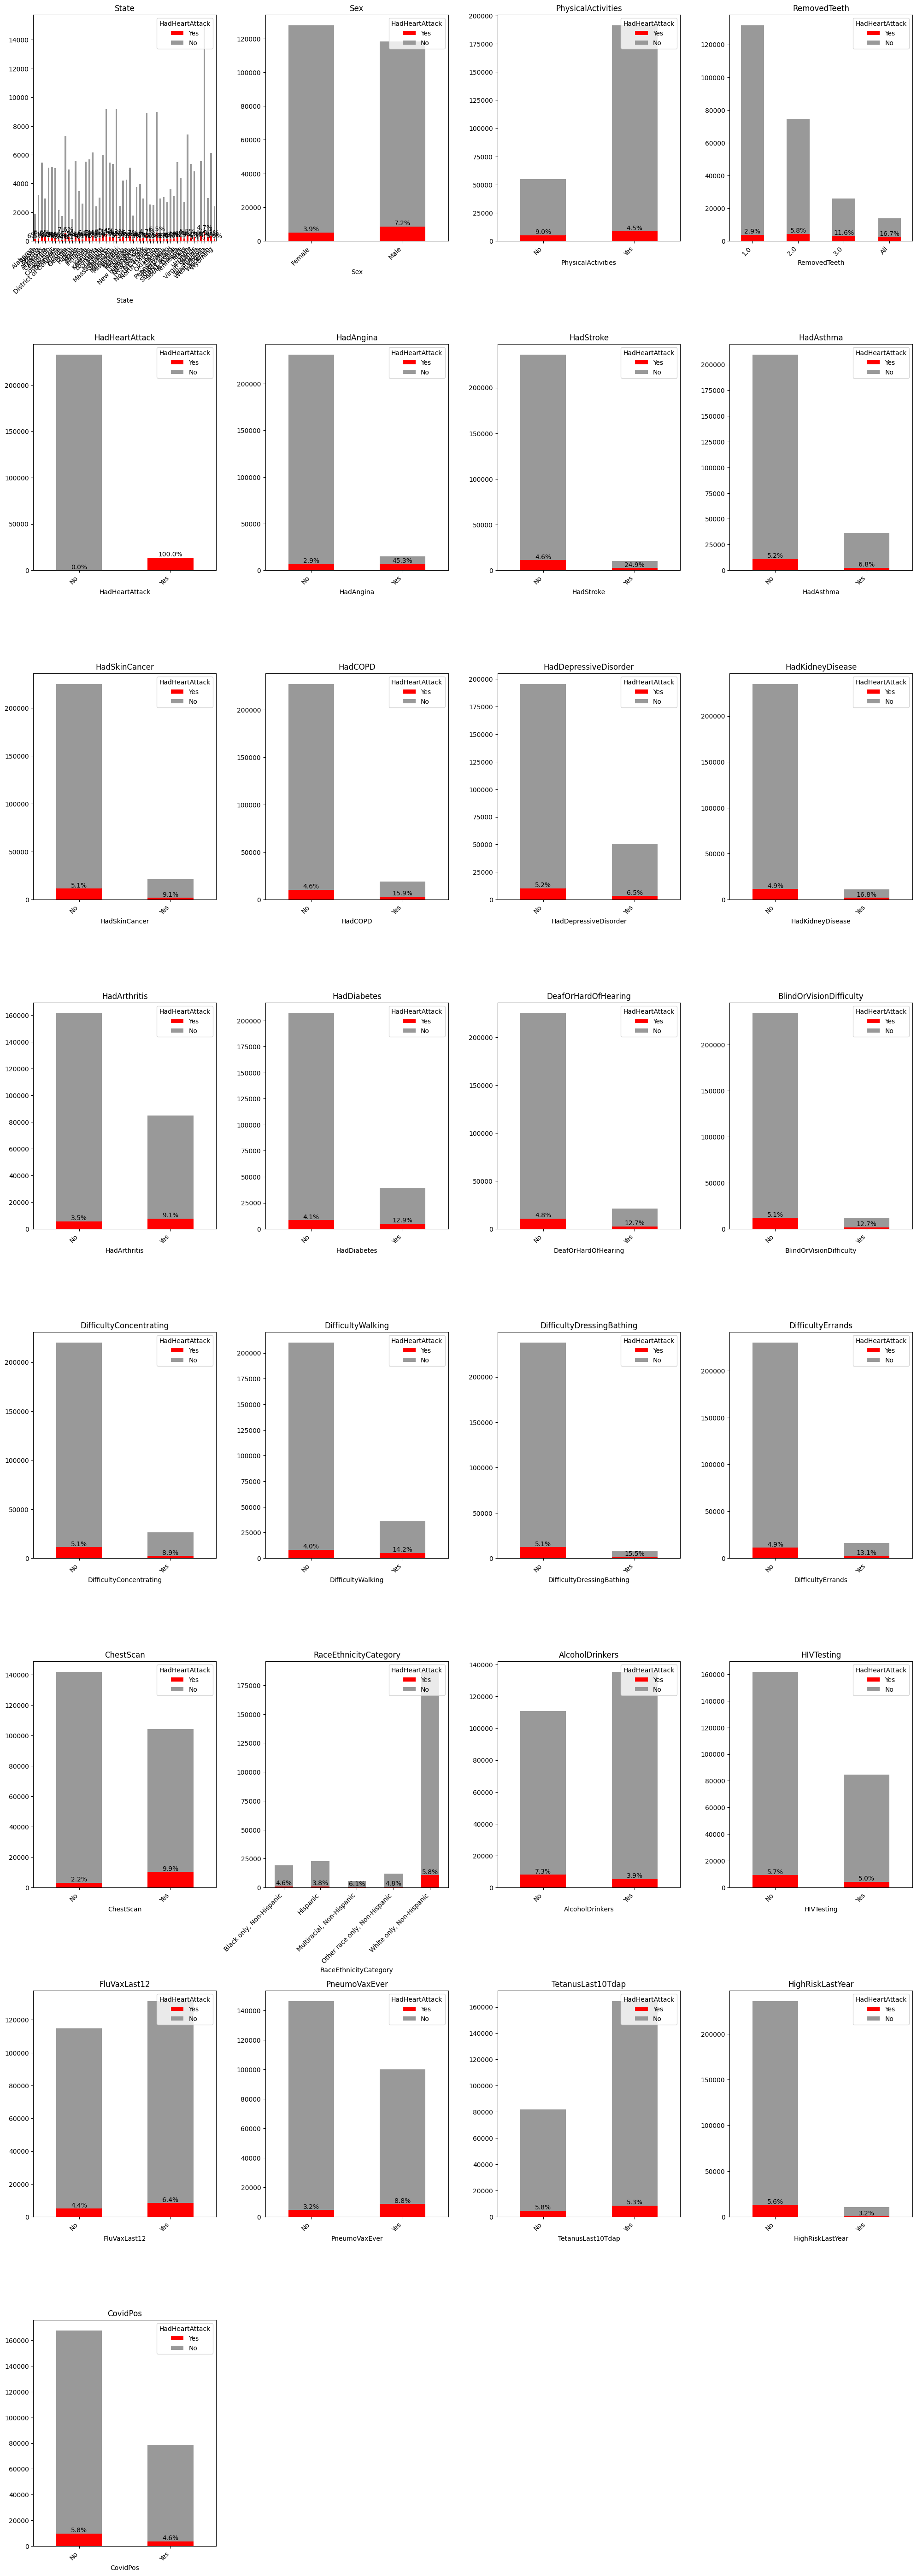

In [97]:
# Select object type columns excluding 'HadHeartAttack'
object_columns = df.select_dtypes(include=['object']).columns
if 'HadHeartAttack' in object_columns:
    numerical_columns = object_columns.drop('HadHeartAttack')

# Determine the layout of the subplots
num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 7))  # Increased figure size for better readability

for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create a cross-tabulation of the current column and HadHeartAttack with counts
    cross_tab = pd.crosstab(df[col], df['HadHeartAttack'])
    
    # Reorder columns to have 'Yes' on top
    cross_tab = cross_tab[['Yes', 'No']]
    
    # Plot stacked bar chart with custom colors
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', '#999'])
    
    # Calculate and display the percentage of "Yes" for HadHeartAttack
    if 'Yes' in cross_tab.columns:
        yes_counts = cross_tab['Yes']
        total_counts = cross_tab.sum(axis=1)
        proportions = yes_counts / total_counts
        for idx, (count, prop) in enumerate(zip(yes_counts, proportions)):
            plt.text(idx, count, f'{prop:.1%}', ha='center', va='bottom')
    
    plt.title(col)
    plt.legend(title='HadHeartAttack', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

### Stacked Histogram

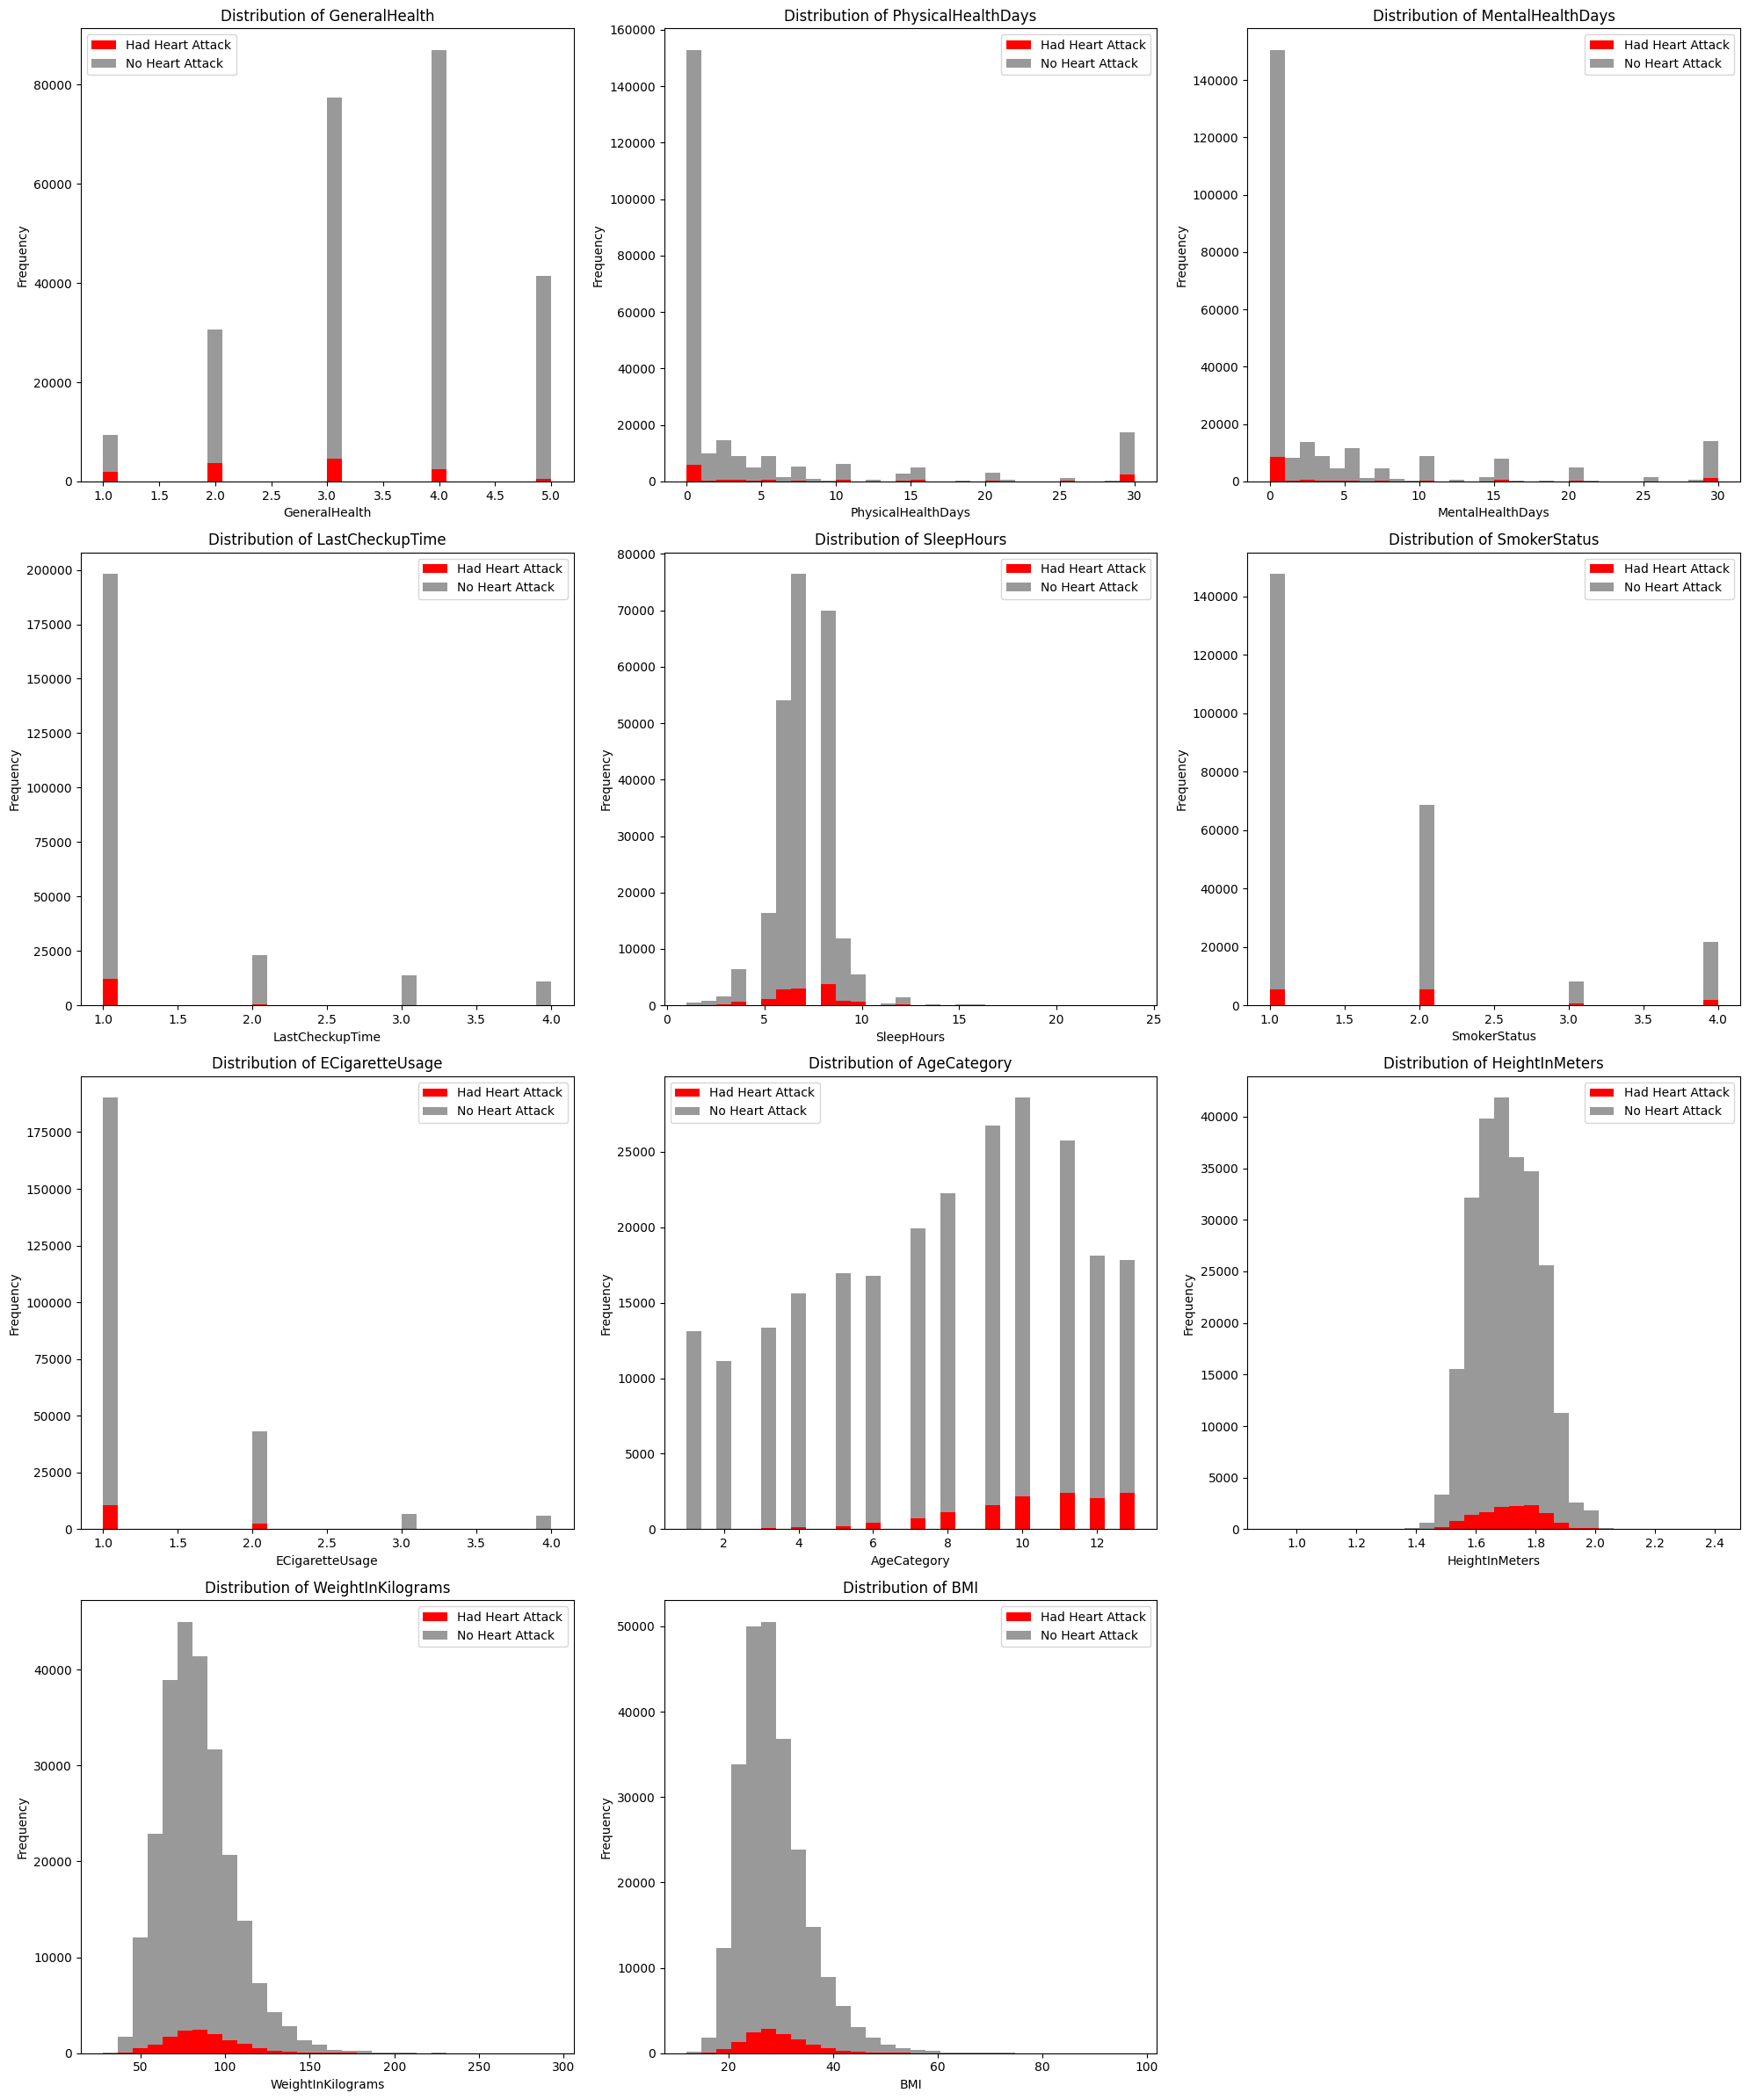

In [118]:
# Select numerical columns excluding 'HadHeartAttack'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
if 'HadHeartAttack' in numerical_columns:
    numerical_columns = numerical_columns.drop('HadHeartAttack')

# Determine the layout of the subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 6))  # Adjust figure size for better readability

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create stacked histogram
    plt.hist([df[df['HadHeartAttack'] == 'Yes'][col], df[df['HadHeartAttack'] == 'No'][col]], 
             stacked=True, 
             label=['Had Heart Attack', 'No Heart Attack'],
             color=['red', '#999'],
             bins=30)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


### Correlation Matrix

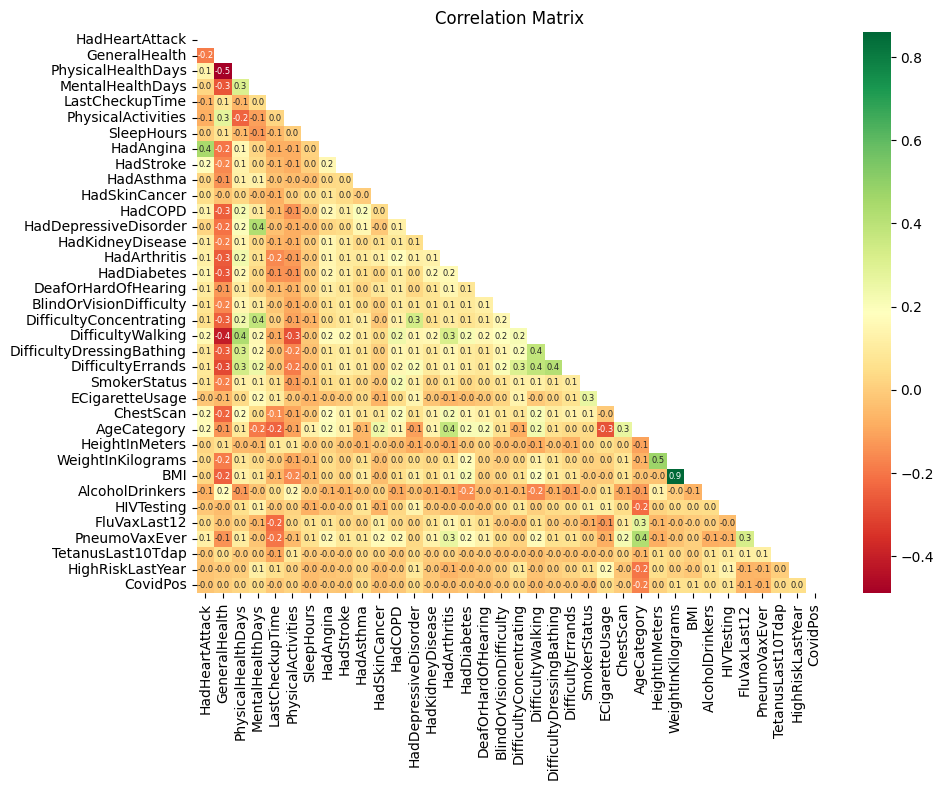

In [126]:
# show the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_num.corr()

# Reorder columns to put 'HadHeartAttack' first
columns = ['HadHeartAttack'] + [col for col in corr_matrix.columns if col != 'HadHeartAttack']
corr_matrix = corr_matrix.reindex(columns=columns, index=columns)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='RdYlGn', annot_kws={'size': 6})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
